In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

alpha = 2  
size = 1000  
pareto_data = pareto.rvs(alpha, size=size, random_state=42)

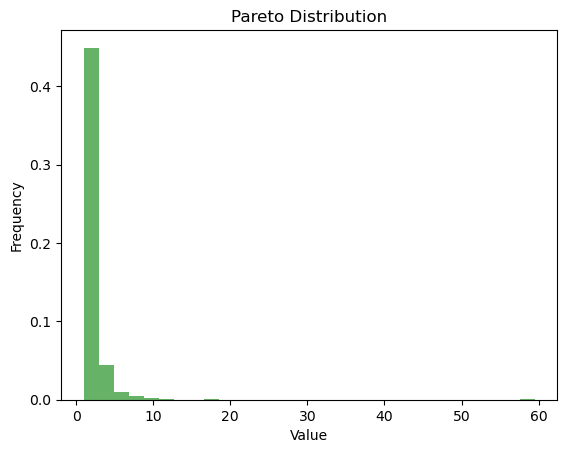

In [23]:
# Exercise 1: Import the data, draw their histogram
plt.hist(pareto_data, bins=30, density=True, alpha=0.6, color='g')
plt.title('Pareto Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


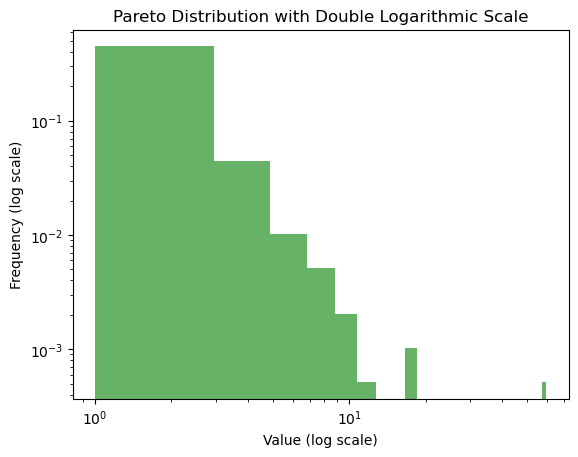

In [24]:
# Exercise 2: Correct the scale of the plot’s axes to double logarithmic
plt.hist(pareto_data, bins=30, density=True, alpha=0.6, color='g')
plt.xscale('log')
plt.yscale('log')
plt.title('Pareto Distribution with Double Logarithmic Scale')
plt.xlabel('Value (log scale)')
plt.ylabel('Frequency (log scale)')
plt.show()

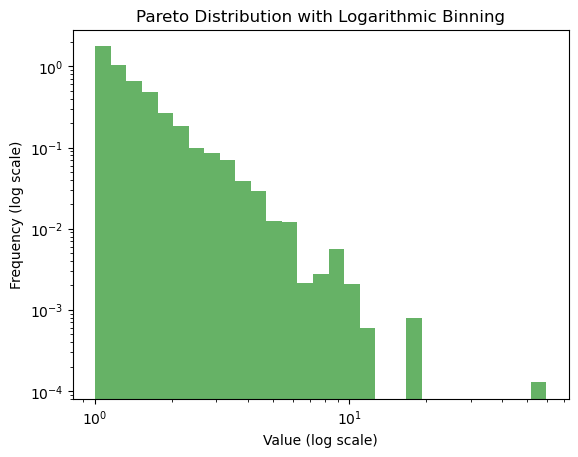

In [25]:
# Exercise 3: Apply logarithmic binning
log_bins = np.logspace(np.log10(min(pareto_data)), np.log10(max(pareto_data)), 30)
plt.hist(pareto_data, bins=log_bins, density=True, alpha=0.6, color='g')
plt.xscale('log')
plt.yscale('log')
plt.title('Pareto Distribution with Logarithmic Binning')
plt.xlabel('Value (log scale)')
plt.ylabel('Frequency (log scale)')
plt.show()


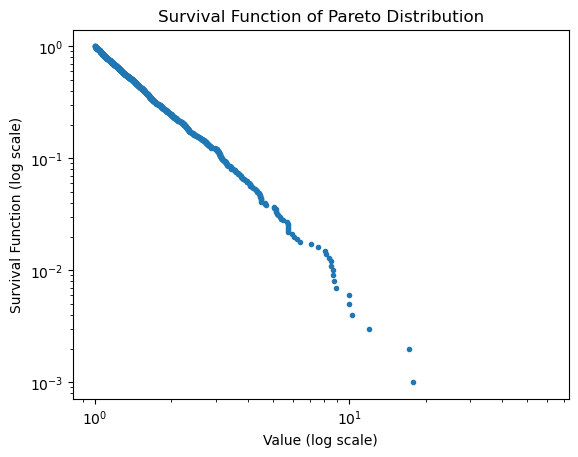

In [26]:
# Exercise 4: Compute and draw the survival function
sorted_data = np.sort(pareto_data)
survival_function = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.plot(sorted_data, survival_function, marker='.', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.title('Survival Function of Pareto Distribution')
plt.xlabel('Value (log scale)')
plt.ylabel('Survival Function (log scale)')
plt.show()

In [27]:

# Exercise 5: Analysis of readability and robustness
# The double logarithmic scale plot is the most readable as it clearly shows the distribution over a wide range of values.
# The logarithmic binning plot is the most robust for noise as it reduces the impact of outliers and provides a clearer view of the distribution.

In [30]:
from sklearn.linear_model import LinearRegression

# Take the logarithm of the sorted data and the survival function
log_sorted_data = np.log(sorted_data)
log_survival_function = np.log(survival_function)

# Reshape the data for linear regression
X = log_sorted_data.reshape(-1, 1)
# Filter out -inf values from y and corresponding X values
valid_indices = np.isfinite(log_survival_function)
X = log_sorted_data[valid_indices].reshape(-1, 1)
y = log_survival_function[valid_indices]

# Perform linear regression
reg = LinearRegression().fit(X, y)

# The slope of the regression line is the negative of the alpha estimator
alpha_estimator = -reg.coef_[0]
print(f"Estimated alpha: {alpha_estimator}")

Estimated alpha: 2.0791242387168065


/var/folders/87/dhv__9sj0yv1kz0pfv2ds9nh0000gn/T/ipykernel_43547/1891167037.py:5: RuntimeWarning: divide by zero encountered in log
  log_survival_function = np.log(survival_function)


In [ ]:
# Filter out zero values from the survival function
non_zero_survival_function = survival_function[survival_function > 0]

# Take the logarithm of the sorted data and the non-zero survival function
log_sorted_data = np.log(sorted_data[:len(non_zero_survival_function)])
log_survival_function = np.log(non_zero_survival_function)

# Reshape the data for linear regression
X = log_sorted_data.reshape(-1, 1)
# Filter out -inf values from y and corresponding X values
valid_indices = np.isfinite(log_survival_function)
X = log_sorted_data[valid_indices].reshape(-1, 1)
y = log_survival_function[valid_indices]

# Perform linear regression
reg = LinearRegression().fit(X, y)

# The slope of the regression line is the negative of the alpha estimator
alpha_estimator = -reg.coef_[0]
print(f"Estimated alpha: {alpha_estimator}")


In [36]:
from sklearn.linear_model import LinearRegression

log_sorted_data = np.log(sorted_data)
non_zero_survival_function = survival_function[survival_function > 0]

log_survival_function = np.log(non_zero_survival_function)

X = log_sorted_data[:len(non_zero_survival_function)].reshape(-1, 1)
# Filter out -inf values from y
valid_indices = np.isfinite(log_survival_function)
X = X[valid_indices].reshape(-1, 1)
y = log_survival_function[valid_indices]

reg = LinearRegression().fit(X, y)

# The slope of the regression line is the negative of the alpha estimator
alpha_estimator = -reg.coef_[0]
print(f"Estimated alpha: {alpha_estimator}")

Estimated alpha: 2.0791242387168065


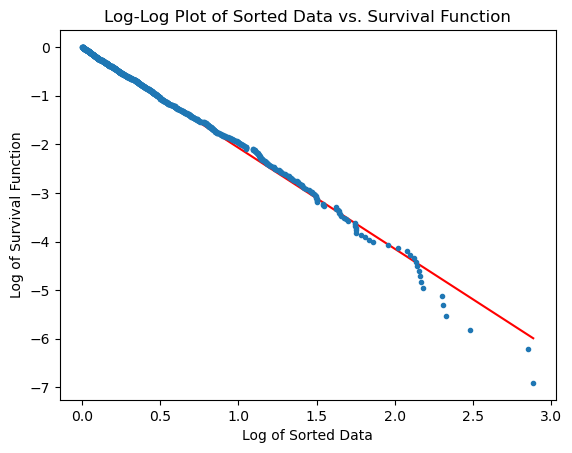

In [38]:
plt.plot(X, reg.predict(X), color='red', label='Regression Line')
plt.plot(X, log_survival_function, marker='.', linestyle='none')
plt.xlabel('Log of Sorted Data')
plt.ylabel('Log of Survival Function')
plt.title('Log-Log Plot of Sorted Data vs. Survival Function')
plt.show()

In [40]:
# Exercise 7
# Known minimum value of the distribution
xmin = min(sorted_data)

# Number of observations
n = len(sorted_data)

# Computing the MLE estimator for alpha after derivation
alpha_mle = 1 + n / np.sum(np.log(sorted_data / xmin))

print(f"MLE estimator for alpha: {alpha_mle}")

MLE estimator for alpha: 3.0664078090784246


Exercise 8

If x_min is not known, the estimation of alpha depends on which portion of the data is included in the analysis. Larger values of x_min can increase variance of alpha estimate.

The result for alpha will change because the set of data points used in the estimation may vary depending on the chosen x_min